<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/Ex_Logistic_Regression_as_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 - Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py #download data package

In [ ]:
from google.colab import drive #執行這個後點網址可以登入google，登入後會顯示authorization code，再輸入到下面框框
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os #連上雲端硬碟

os.chdir("/content/drive/My Drive/Colab Notebooks/dataset") #可自行在Colab Notebooks後方更改路徑
os.getcwd() #查看當前路徑

'/content/drive/My Drive/Colab Notebooks/dataset'

## 2 - Overview of the Problem set



1.   Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
2.   Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
3.   "Standardize" the data








In [ ]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes(抓解答)

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) #確認矩陣維度
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

y = 0, it's a 'non-cat' picture.


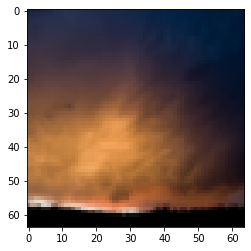

In [ ]:
index = 0 #-209 #負值也可以，變成從後面算回來。
plt.imshow(train_set_x_orig[index]) #看資料樣子
print("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[train_set_y[0, index]].decode("utf-8") +  "' picture.")

In [ ]:
print(train_set_x_orig.shape)
print(test_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_y.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)
(1, 209)
(1, 50)


In [ ]:
m_train = train_set_x_orig.shape[0] #找出train的資料量
m_test = test_set_x_orig.shape[0] #找出test的資料量
num_px = train_set_x_orig.shape[1] #找出train的長寬(因為相同，長寬取一項就好)

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px)) #長寬比
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")  #有RGB所以最後還有一維是3
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
#攤平,但各sample要區分(第一維要保留)，-1 => 剩餘維度皆合併
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
#test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1) #比較轉秩

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0])) #檢查而已

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [ ]:
train_set_x = train_set_x_flatten/255. 
test_set_x = test_set_x_flatten/255.
#將0~255縮小成0~1之間，類似於標準化的方法(數值太大會梯度消失)，但是他是pixel沒有所謂的好壞。
#如果用標準化的話會有負值，我們用relu或其他方法可能會將負值犧牲掉，因此不用標準化，除上255。
print(train_set_x_flatten)
print(train_set_x)

[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]
[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]


## 3 - General Architecture of the learning algorithm


1.   Initialize the parameters of the model
2.*   Learn the parameters for the model by minimizing the cost  
3.   Use the learned parameters to make predictions (on the test set)
4.   Analyse the results and conclude



## 4 - Building the parts of our algorithm



1.   Define the model structure (such as number of input features)
2.   Initialize the model's parameters
3.   Loop:
> *   Calculate current loss (forward propagation)
> *   Calculate current gradient (backward propagation)
> *   Update parameters (gradient descent)



### 4.1 - Helper functions: sigmoid(z)

In [ ]:
def sigmoid(z): #建立sigmoid function
    
    """
    # Compute the sigmoid of z
    # Arguments: z
    # Returns: s = sigmoid(z)
    """

    s = 1/(1+np.exp(-1*z))
    
    return s

In [ ]:
print ("sigmoid([0, 1.8]) = " + str(sigmoid(np.array([0, 1.8]))))

sigmoid([0, 1.8]) = [0.5        0.85814894]


### 4.2 - Initializing parameters: initialize_with_zeros(dim)

In [ ]:
def initialize_with_zeros(dim): #初始化權重input = 維度
    
    """
    # Creates a vector of zeros(dim, 1) for w and initializes b to 0.
    # Arguments: dim    
    # Returns: w, b
    """
    
    w = np.zeros([dim, 1])
    b = 0 #w,b目前初始化用0，但之後就不會用0了，效果會不太好(怎麼train都是相同係數[w都設0]，梯度消失[w設太大])。

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))
print(w.shape)

w = [[0.]
 [0.]]
b = 0
(2, 1)


### 4.3 - Forward and Backward propagation: propagate(w, b, X, Y)

In [ ]:
def propagate(w, b, X, Y): #計算權重與bias的函式
    
    """
    # Implement the cost function and its gradient
    # Arguments: w(num_px * num_px * 3, 1), b, X(num_px * num_px * 3, number of examples), Y(1, number of examples)
    # Returns: cost, dw, db
    """
    
    m = X.shape[1] #要抓資料筆數，如果選0就是feature數量
    # 正向
    A = sigmoid(np.dot(w.T,X)+b) #維度要正確(2x1)˙(2x3)，w要轉秩
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    #反向
    dw = 1/m*np.dot(X,(A-Y).T) #dw = 12288x1 X=12288x209 (A-Y)=1x209 <-要轉秩 
    db = 1/m*np.sum(A-Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost) #降維(降掉沒用的維度)
    assert(cost.shape == ())
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[2.],[3.]]), 1., np.array([[-1.,-2.,4.],[-2.,1.,-3]]), np.array([[1,0,1]])
###############??????###############


grads, cost = propagate(w, b, X, Y) 
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
print(w.shape)
print(X.shape)
print(Y.shape)

dw = [[-0.66697035]
 [ 1.33272597]]
db = -0.33302964960186643
cost = 2.795735275857888
(2, 1)
(2, 3)
(1, 3)


### 4.4 - Optimization: optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False)

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    """
    # Optimizes w and b
    # Arguments:w, b, X, Y, num_iterations, learning_rate, print_cost -- True to print the loss every 100 steps
    # Returns: params{w, b}, grads{dw, db}, costs
    """
    
    costs = []
    
    for i in range(num_iterations):  #要給他迭代次數
                
        grads, cost = propagate(w, b, X, Y) #呼叫權重跟bias的計算函式
        #w,b,X算出y-hat
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost) #每一百次會記錄一次cost
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[2.11539542]
 [2.1458852 ]]
b = 1.2370850884643623
dw = [[0.08081069]
 [0.8008599 ]]
db = -0.24383028219330308


###If ues sikit-learning

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=2000)
classifier.fit(train_set_x.T, np.squeeze(train_set_y.T))
print("train accuracy: " + str(classifier.score(train_set_x.T, np.squeeze(train_set_y.T))))
print("test accuracy: " + str(classifier.score(test_set_x.T, np.squeeze(test_set_y.T))))

train accuracy: 1.0
test accuracy: 0.72


### 4.5 - Prediciton: predict(w, b, X)

In [ ]:
def predict(w, b, X):
    
    """
    # Using learned logistic regression parameters (w, b) to predict
    # Arguments: w, b, X 
    # Returns: Y_prediction
    """
    #只會有w,b,X，用來找出Y-hat，但是不會有Y,因為式test
    
    m = X.shape[1] #取出資料筆數
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
w = np.array([[0.3224579],[-0.11406775]])
b = 0.5
X = np.array([[-1.5,1.1,-2.2],[3.2,-2.,1.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[0. 1. 0.]]


## 5 - Merge all functions into a model

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    #開始訓練model
    """
    # Builds the logistic regression model
    # Arguments: X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost
    # Returns:d -- dictionary containing information about the model.
    """
    #先初始化w,b
    w, b = initialize_with_zeros(X_train.shape[0]) #需要X的維度 

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    #w,b會在parameters中
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)
#放入的是縮小後x,y的train與test

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


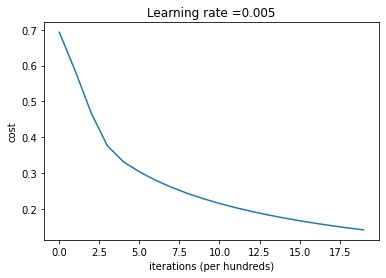

In [ ]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## 6 - Further analysis

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



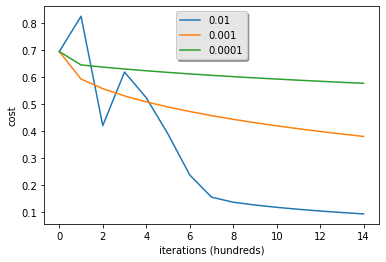

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

###梯度消失的話，越靠近input的layer會越嚴重，因為梯度下降是反向累積的，會導致神經網路無法更新(怎摸更新都一樣)。

###W=(4,3) w的維度4代表該層有4個node，3代表前一層(input)有3個node。